In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
!pip install phik
import phik
from phik import resources
from phik.binning import bin_data
from phik.decorators import *
from phik.report import  plot_correlation_matrix
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pickle

In [11]:
df = pd.read_csv('wines-clases-data.csv', header=None, names=['class', 'Alcohol','ácido málico','Ceniza','Alcalinidad de la ceniza','magnesio',
'fenoles totales','Flavonoides','Fenoles no flavonoides','Proantocianinas','intensidad del color','Tono','OD280/OD315 de vinos diluidos',
'Prolina'])
df

,class,Alcohol,ácido málico,Ceniza,Alcalinidad de la ceniza,magnesio,fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,intensidad del color,Tono,OD280/OD315 de vinos diluidos,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   class                          178 non-null    int64  
 1   Alcohol                        178 non-null    float64
 2   ácido málico                   178 non-null    float64
 3   Ceniza                         178 non-null    float64
 4   Alcalinidad de la ceniza       178 non-null    float64
 5   magnesio                       178 non-null    int64  
 6   fenoles totales                178 non-null    float64
 7   Flavonoides                    178 non-null    float64
 8   Fenoles no flavonoides         178 non-null    float64
 9   Proantocianinas                178 non-null    float64
 10  intensidad del color           178 non-null    float64
 11  Tono                           178 non-null    float64
 12  OD280/OD315 de vinos diluidos  178 non-null    flo

In [6]:
df.describe()

,class,Alcohol,ácido málico,Ceniza,Alcalinidad de la ceniza,magnesio,fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,intensidad del color,Tono,OD280/OD315 de vinos diluidos,Prolina
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

class                            0
Alcohol                          0
ácido málico                     0
Ceniza                           0
Alcalinidad de la ceniza         0
magnesio                         0
fenoles totales                  0
Flavonoides                      0
Fenoles no flavonoides           0
Proantocianinas                  0
intensidad del color             0
Tono                             0
OD280/OD315 de vinos diluidos    0
Prolina                          0
dtype: int64

Text(0.5, 1.0, 'Wine Classes')

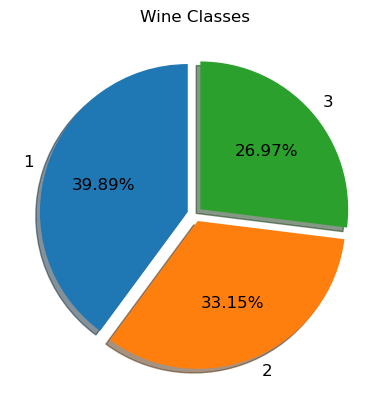

In [33]:
plt.pie(df['class'].value_counts(), labels=df['class'].unique(), autopct='%0.2f%%', startangle=90 ,shadow=True, 
        explode=(0.05, 0.05, 0.05),      
        textprops={'fontsize': 12} )
plt.title('Wine Classes')

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


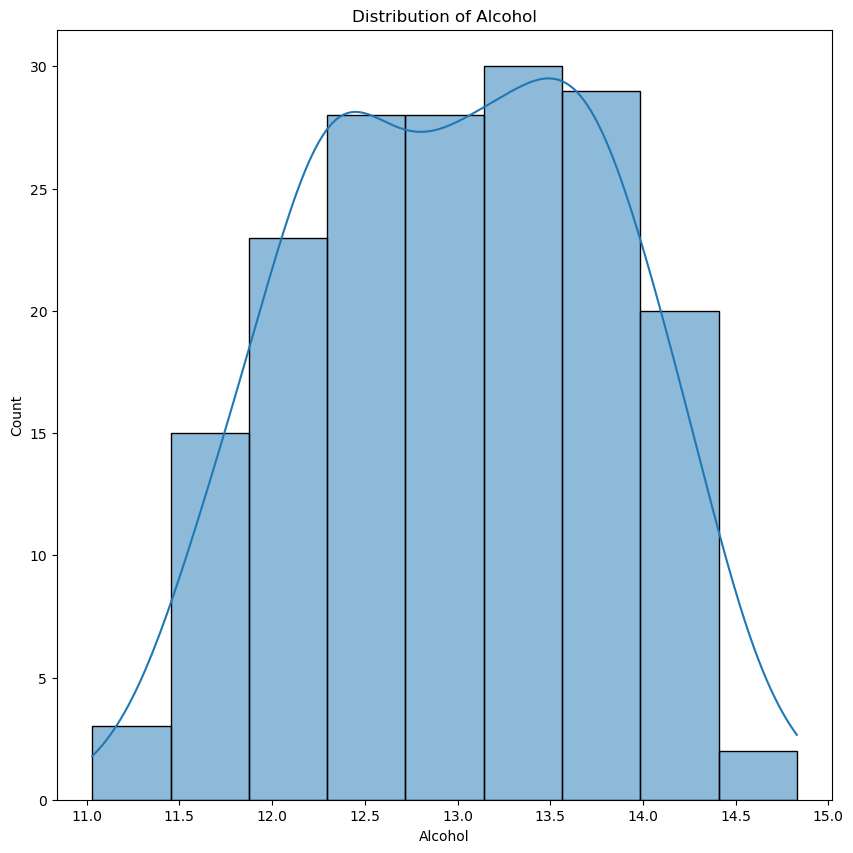

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


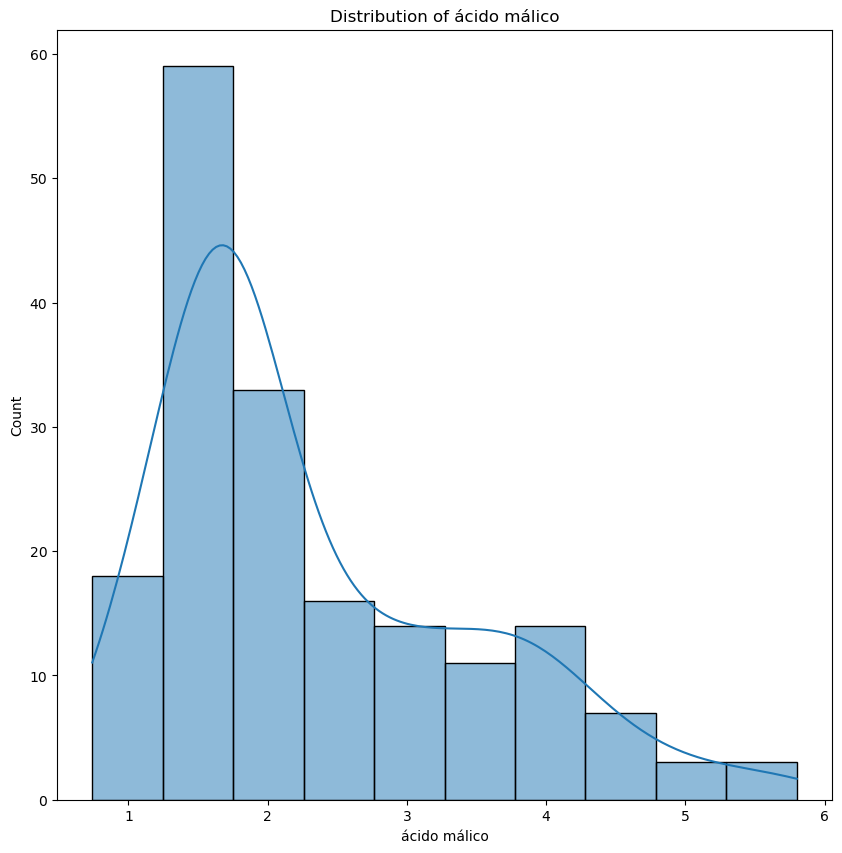

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


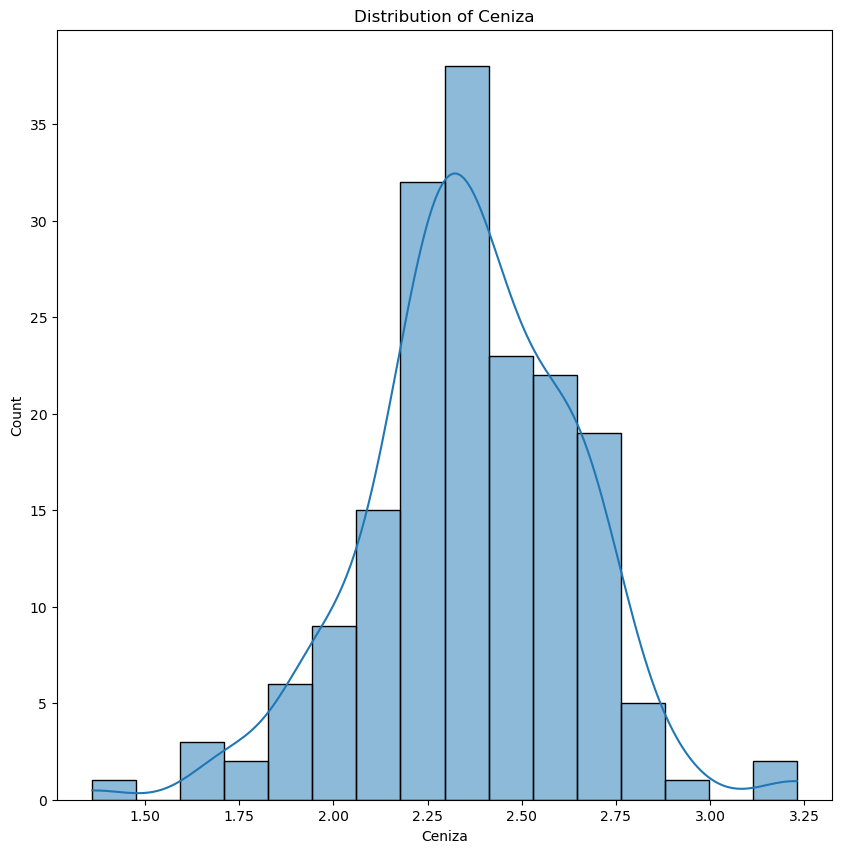

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


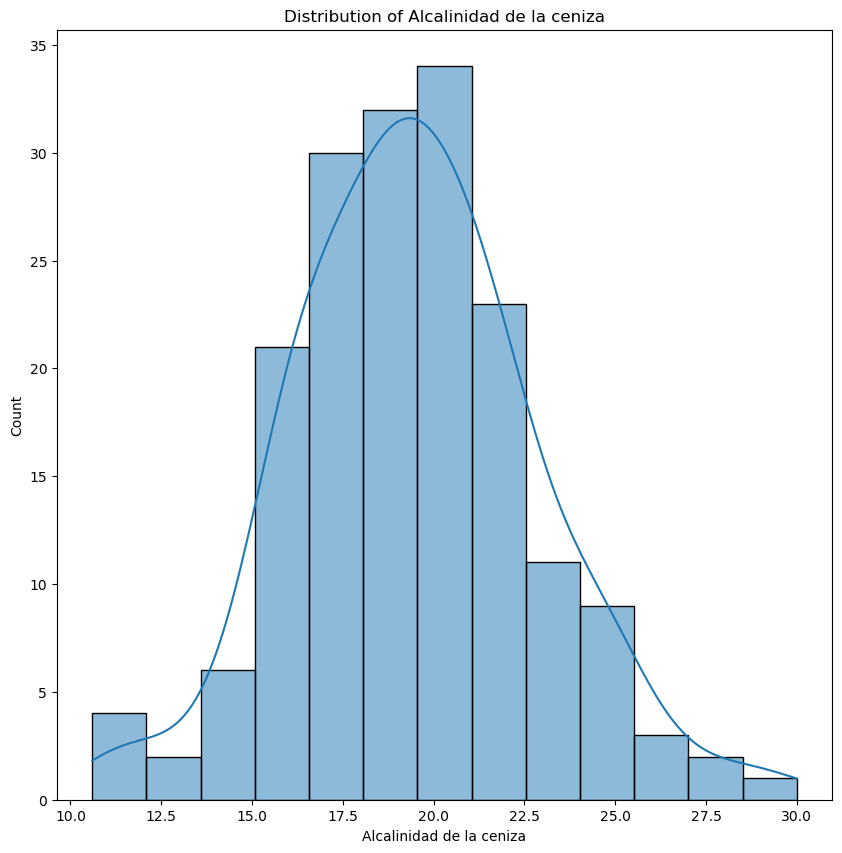

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


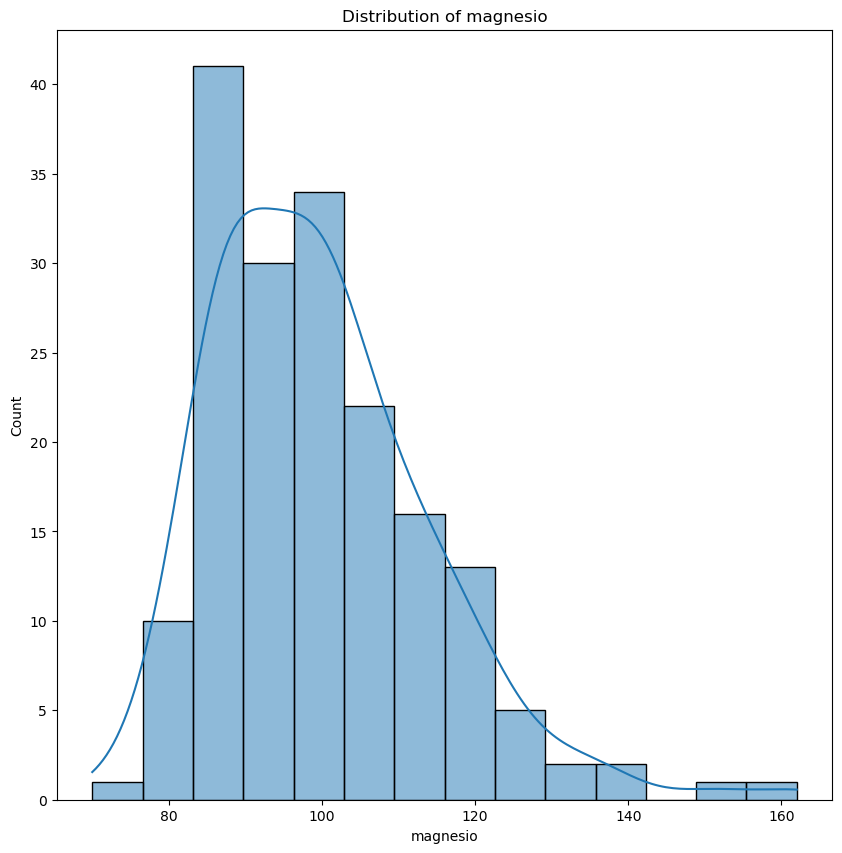

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


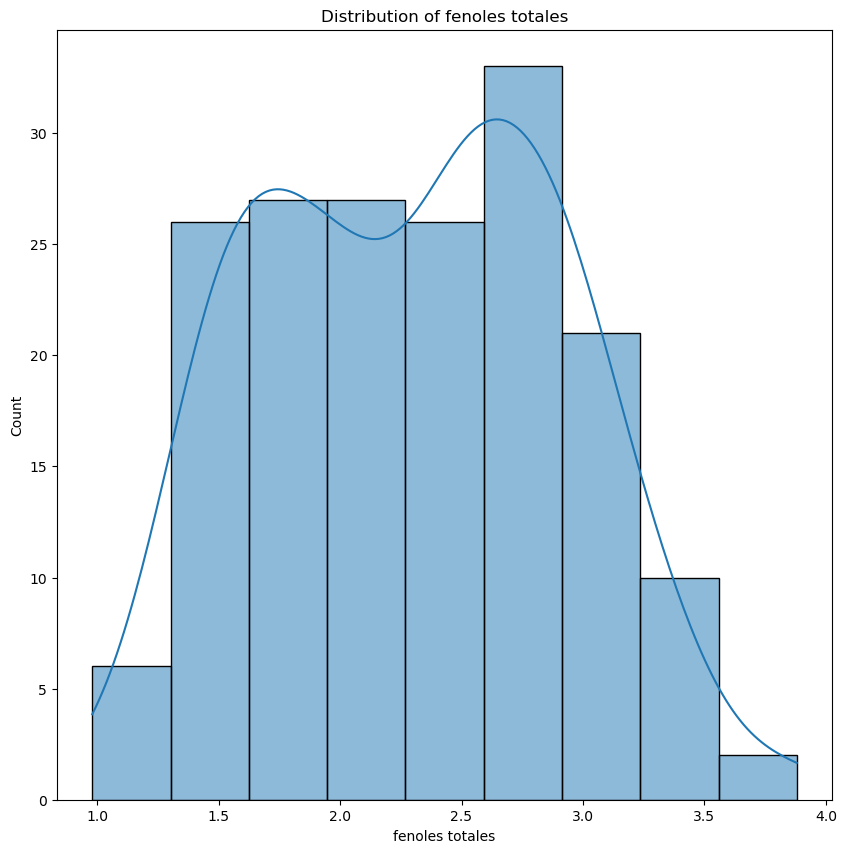

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


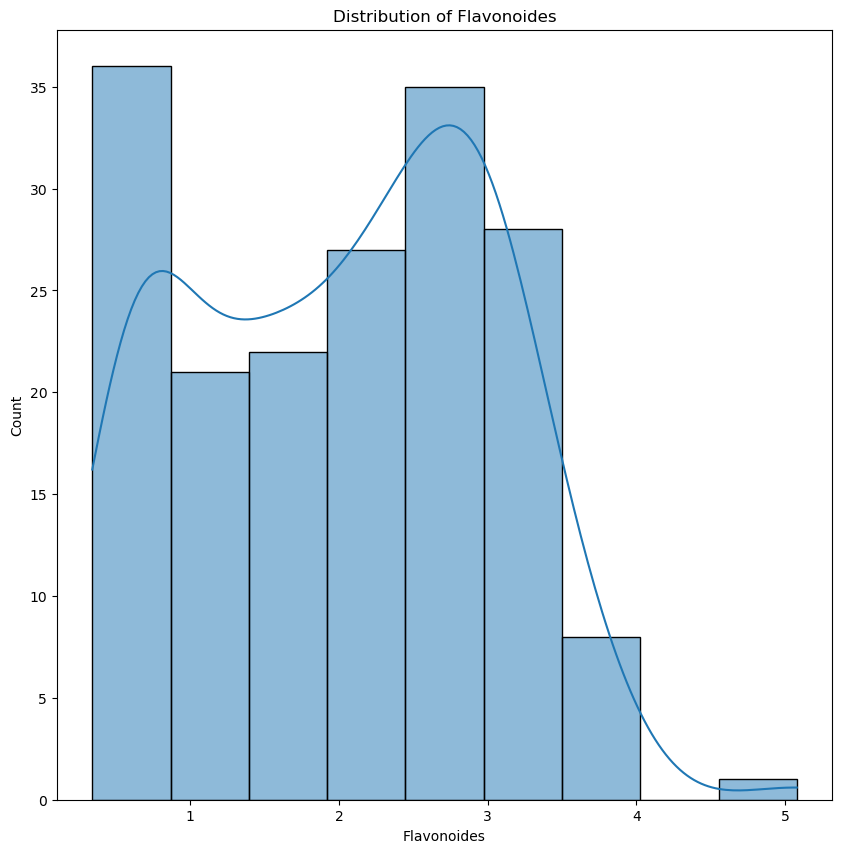

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


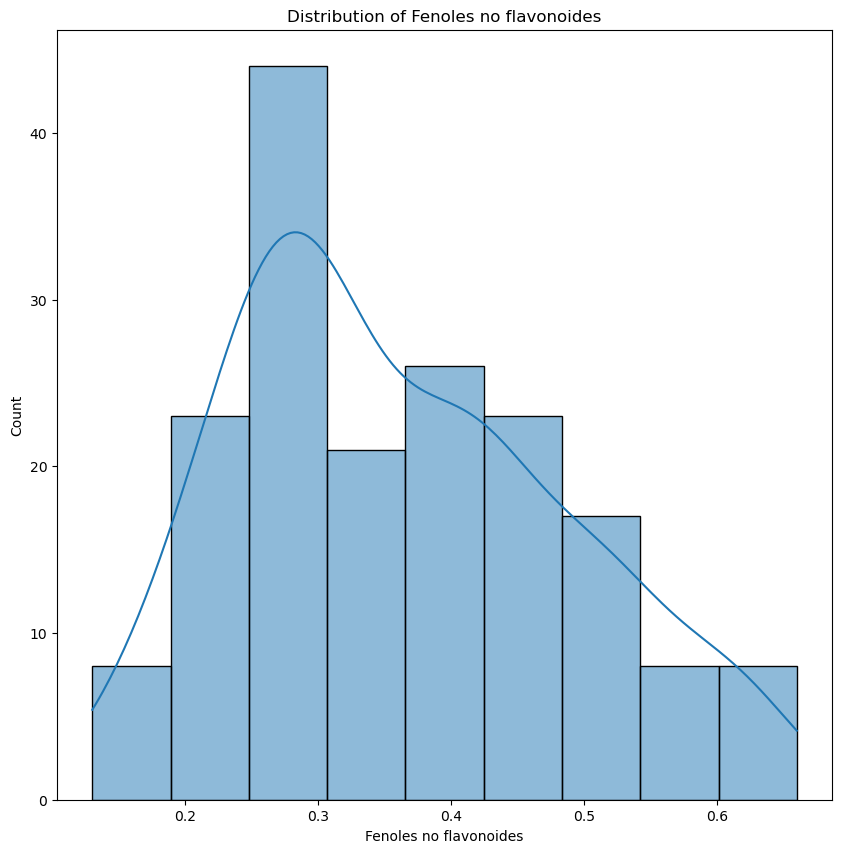

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


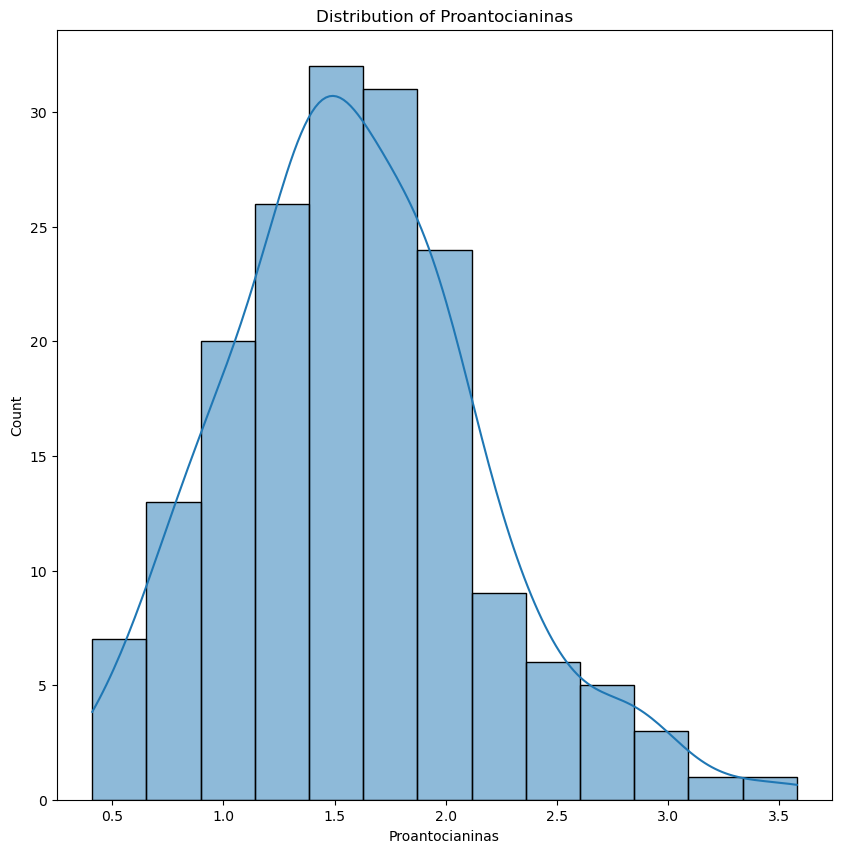

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


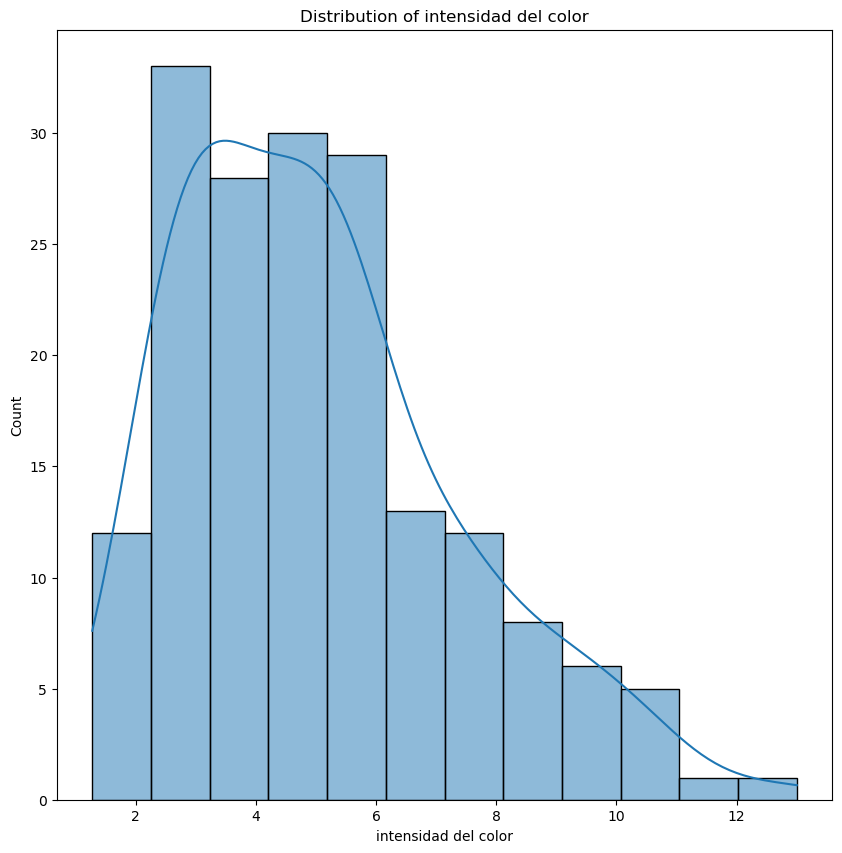

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


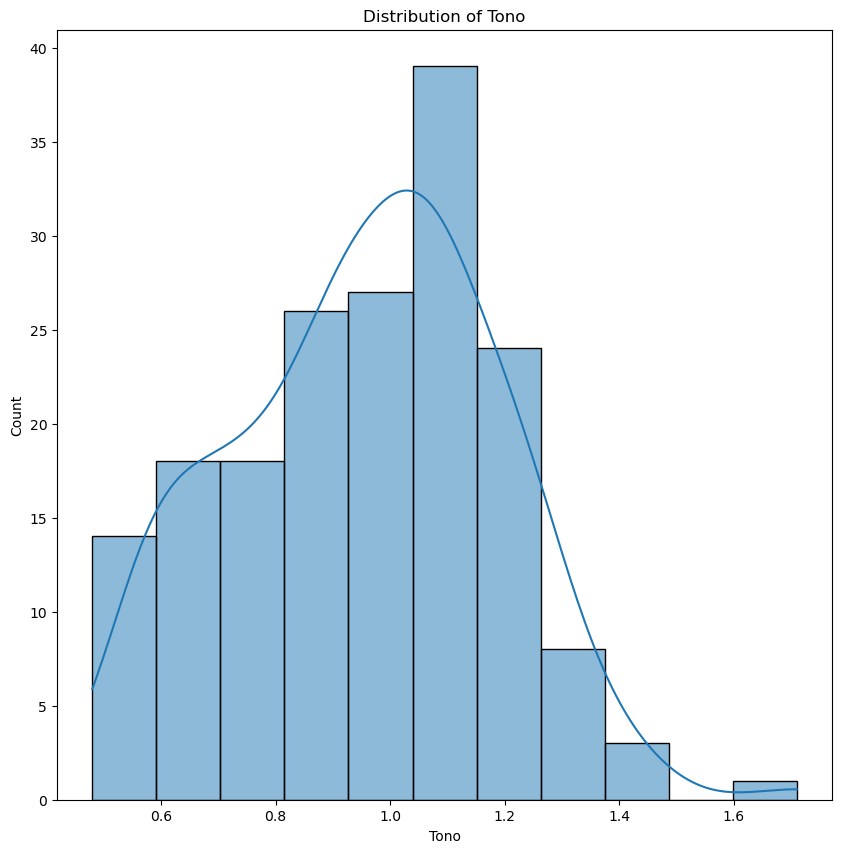

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


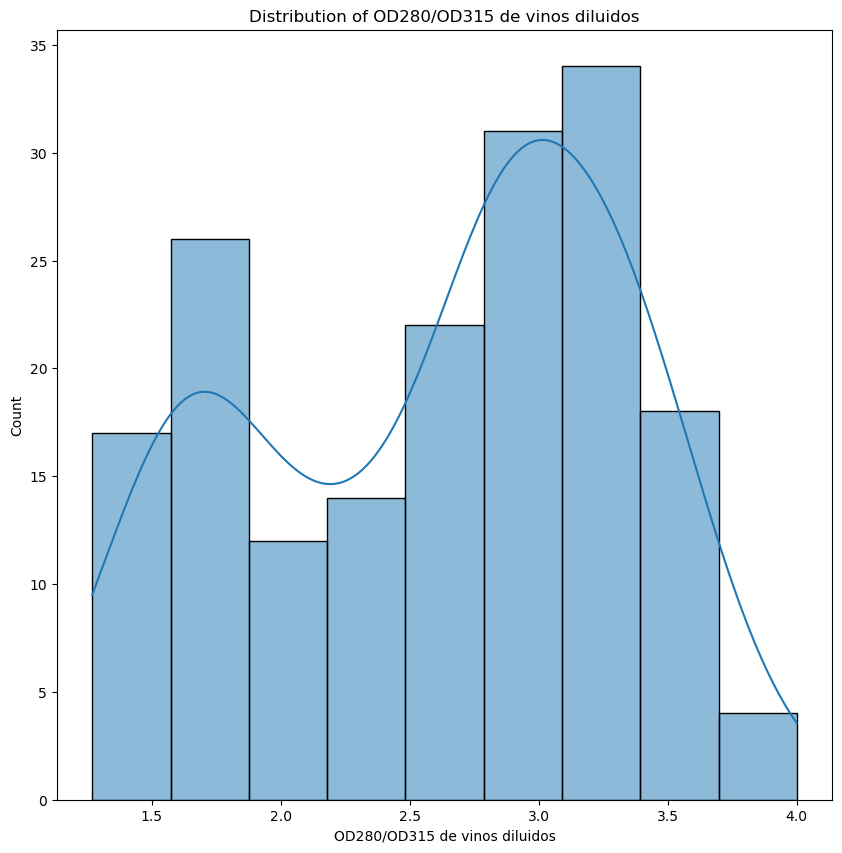

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


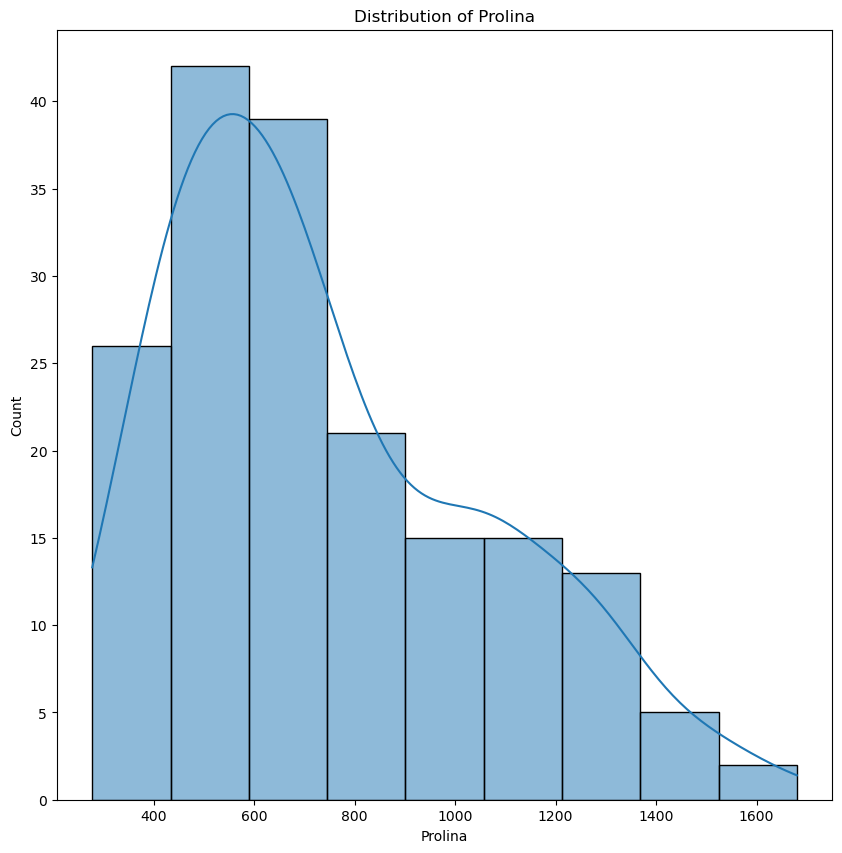

In [22]:
for i in cols:
    plt.figure(figsize=(10,10))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

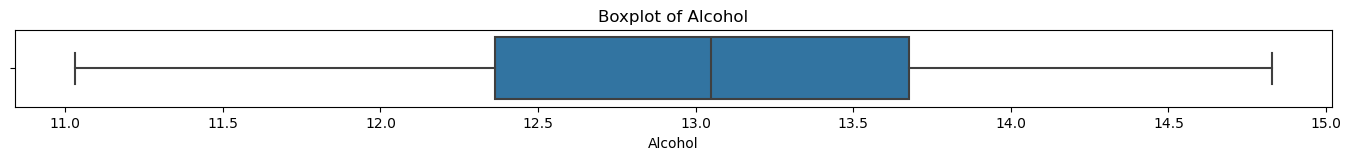

Minimum of Alcohol: 11.03 
First Quartile of Alcohol: 12.362499999999999 
Median of Alcohol: 13.05 
Third Quartile of Alcohol: 13.6775 
Maximum of Alcohol: 14.83


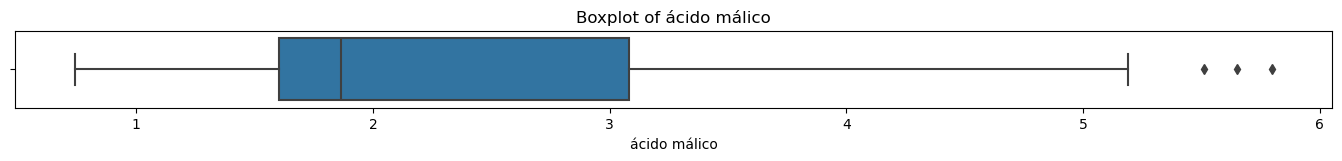

Minimum of ácido málico: 0.74 
First Quartile of ácido málico: 1.6025 
Median of ácido málico: 1.8650000000000002 
Third Quartile of ácido málico: 3.0825 
Maximum of ácido málico: 5.8


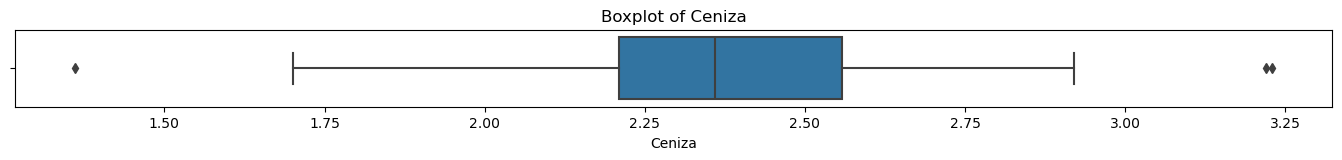

Minimum of Ceniza: 1.36 
First Quartile of Ceniza: 2.21 
Median of Ceniza: 2.36 
Third Quartile of Ceniza: 2.5575 
Maximum of Ceniza: 3.23


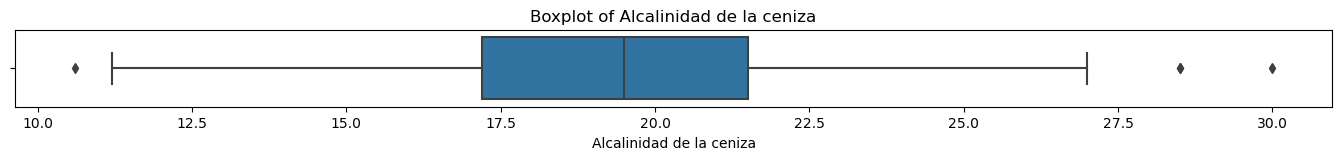

Minimum of Alcalinidad de la ceniza: 10.6 
First Quartile of Alcalinidad de la ceniza: 17.2 
Median of Alcalinidad de la ceniza: 19.5 
Third Quartile of Alcalinidad de la ceniza: 21.5 
Maximum of Alcalinidad de la ceniza: 30.0


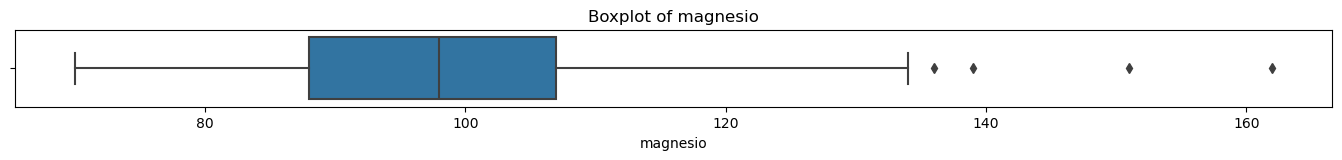

Minimum of magnesio: 70 
First Quartile of magnesio: 88.0 
Median of magnesio: 98.0 
Third Quartile of magnesio: 107.0 
Maximum of magnesio: 162


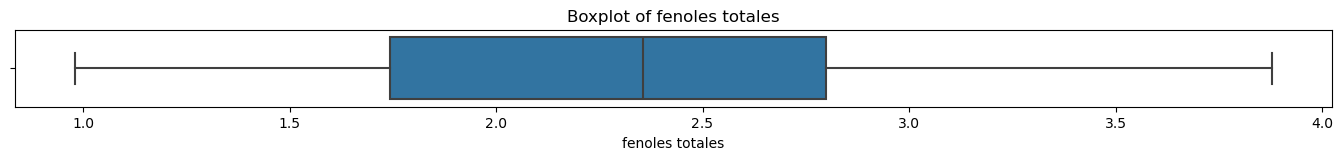

Minimum of fenoles totales: 0.98 
First Quartile of fenoles totales: 1.7425 
Median of fenoles totales: 2.355 
Third Quartile of fenoles totales: 2.8 
Maximum of fenoles totales: 3.88


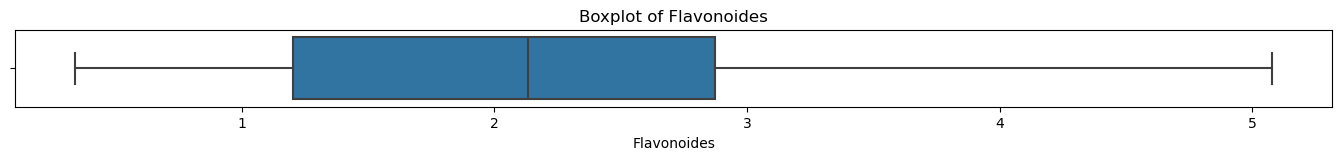

Minimum of Flavonoides: 0.34 
First Quartile of Flavonoides: 1.205 
Median of Flavonoides: 2.135 
Third Quartile of Flavonoides: 2.875 
Maximum of Flavonoides: 5.08


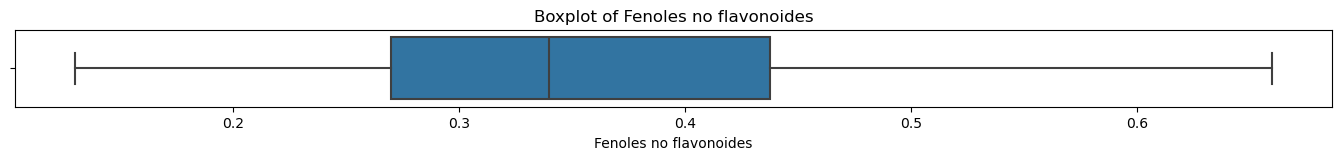

Minimum of Fenoles no flavonoides: 0.13 
First Quartile of Fenoles no flavonoides: 0.27 
Median of Fenoles no flavonoides: 0.34 
Third Quartile of Fenoles no flavonoides: 0.4375 
Maximum of Fenoles no flavonoides: 0.66


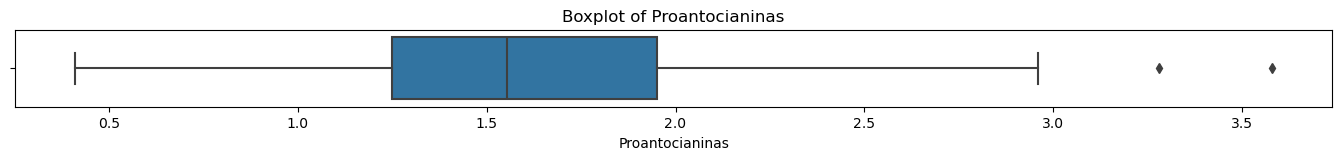

Minimum of Proantocianinas: 0.41 
First Quartile of Proantocianinas: 1.25 
Median of Proantocianinas: 1.5550000000000002 
Third Quartile of Proantocianinas: 1.95 
Maximum of Proantocianinas: 3.58


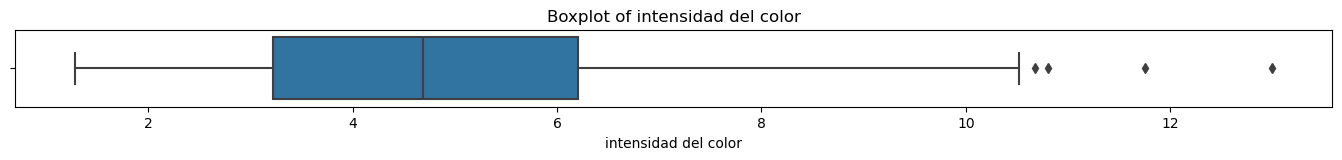

Minimum of intensidad del color: 1.28 
First Quartile of intensidad del color: 3.2199999999999998 
Median of intensidad del color: 4.6899999999999995 
Third Quartile of intensidad del color: 6.2 
Maximum of intensidad del color: 13.0


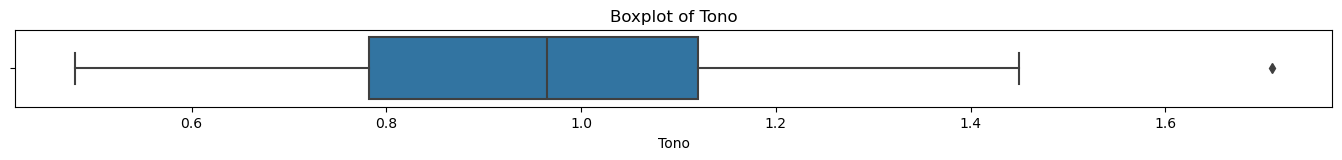

Minimum of Tono: 0.48 
First Quartile of Tono: 0.7825 
Median of Tono: 0.965 
Third Quartile of Tono: 1.12 
Maximum of Tono: 1.71


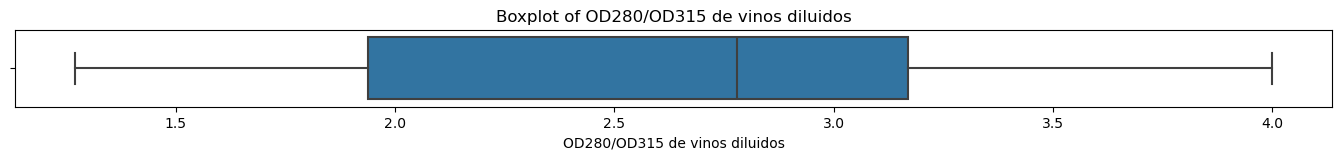

Minimum of OD280/OD315 de vinos diluidos: 1.27 
First Quartile of OD280/OD315 de vinos diluidos: 1.9375 
Median of OD280/OD315 de vinos diluidos: 2.78 
Third Quartile of OD280/OD315 de vinos diluidos: 3.17 
Maximum of OD280/OD315 de vinos diluidos: 4.0


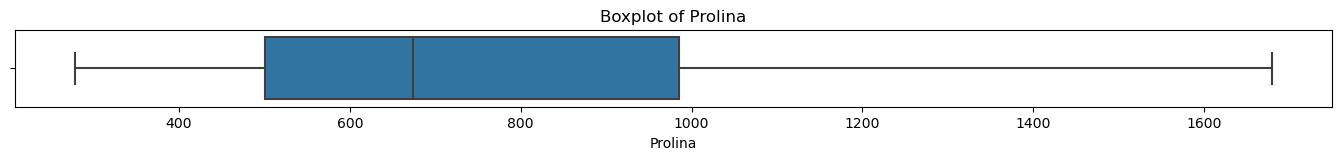

Minimum of Prolina: 278 
First Quartile of Prolina: 500.5 
Median of Prolina: 673.5 
Third Quartile of Prolina: 985.0 
Maximum of Prolina: 1680


In [12]:
cols = df.columns[1:]
for i in cols:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=df[cols], x=i)
  plt.title(f'Boxplot of {i}')
  plt.show()
  print(f'Minimum of {i}: {df[i].min()} \nFirst Quartile of {i}: {df[i].quantile(0.25)} \nMedian of {i}: {df[i].median()} \nThird Quartile of {i}: {df[i].quantile(0.75)} \nMaximum of {i}: {df[i].max()}')
  #np.min(df['release_year']), np.quantile(df['release_year'], 0.25), np.median(df['release_year']), np.quantile(df['release_year'], 0.75), np.max(df['release_year'])

In [14]:
outliers={}
for i in cols:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  outliers[i]=((df[i] <= (Q1 - 1.5*IQR)).sum() | (df[i] >= (Q3 + 1.5*IQR)).sum())

print("Outliers detected in each column:")
outliers

Outliers detected in each column:


{'Alcohol': 0,
 'ácido málico': 3,
 'Ceniza': 3,
 'Alcalinidad de la ceniza': 3,
 'magnesio': 4,
 'fenoles totales': 0,
 'Flavonoides': 0,
 'Fenoles no flavonoides': 0,
 'Proantocianinas': 2,
 'intensidad del color': 4,
 'Tono': 1,
 'OD280/OD315 de vinos diluidos': 0,
 'Prolina': 0}

In [15]:
for i in cols:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  median_val = df[i].median()  # Usar mediana 
  df.loc[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR)), i] = median_val

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_932\351723717.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '673.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR)), i] = median_val


In [16]:
outliers={}
for i in cols:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  outliers[i]=((df[i] <= (Q1 - 1.5*IQR)).sum() | (df[i] >= (Q3 + 1.5*IQR)).sum())

print("Outliers detected in each column:")
outliers

Outliers detected in each column:


{'Alcohol': 0,
 'ácido málico': 1,
 'Ceniza': 3,
 'Alcalinidad de la ceniza': 0,
 'magnesio': 1,
 'fenoles totales': 0,
 'Flavonoides': 0,
 'Fenoles no flavonoides': 0,
 'Proantocianinas': 0,
 'intensidad del color': 3,
 'Tono': 0,
 'OD280/OD315 de vinos diluidos': 0,
 'Prolina': 0}

In [17]:
minmax_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(minmax_scaler.fit_transform(df[cols]), columns=cols)
df_scaled['class'] = df['class']
df_scaled

,Alcohol,ácido málico,Ceniza,Alcalinidad de la ceniza,magnesio,fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,intensidad del color,Tono,OD280/OD315 de vinos diluidos,Prolina,class
0,0.842105,0.217978,0.598361,0.278481,0.890625,0.627586,0.573840,0.283019,0.737255,0.471861,0.577320,0.970696,0.561341,1
1,0.571053,0.233708,0.360656,0.000000,0.468750,0.575862,0.510549,0.245283,0.341176,0.335498,0.587629,0.780220,0.550642,1
2,0.560526,0.364045,0.795082,0.468354,0.484375,0.627586,0.611814,0.320755,0.941176,0.476190,0.567010,0.695971,0.646933,1
3,0.878947,0.271910,0.655738,0.354430,0.671875,0.989655,0.664557,0.207547,0.694118,0.705628,0.391753,0.798535,0.857347,1
4,0.581579,0.415730,0.959016,0.620253,0.750000,0.627586,0.495781,0.490566,0.552941,0.329004,0.577320,0.608059,0.325963,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.252809,0.614754,0.588608,0.390625,0.241379,0.056962,0.735849,0.254902,0.694805,0.164948,0.172161,0.329529,3
174,0.623684,0.712360,0.639344,0.746835,0.500000,0.282759,0.086498,0.566038,0.392157,0.651515,0.226804,0.106227,0.336662,3
175,0.589474,0.795506,0.459016,0.556962,0.781250,0.210345,0.073840,0.566038,0.368627,0.965368,0.113402,0.106227,0.397290,3
176,0.563158,0.415730,0.549180,0.556962,0.781250,0.231034,0.071730,0.754717,0.411765,0.867965,0.123711,0.128205,0.400856,3


interval columns not set, guessing: ['Alcohol', 'ácido málico', 'Ceniza', 'Alcalinidad de la ceniza', 'magnesio', 'fenoles totales', 'Flavonoides', 'Fenoles no flavonoides', 'Proantocianinas', 'intensidad del color', 'Tono', 'OD280/OD315 de vinos diluidos', 'Prolina', 'class']


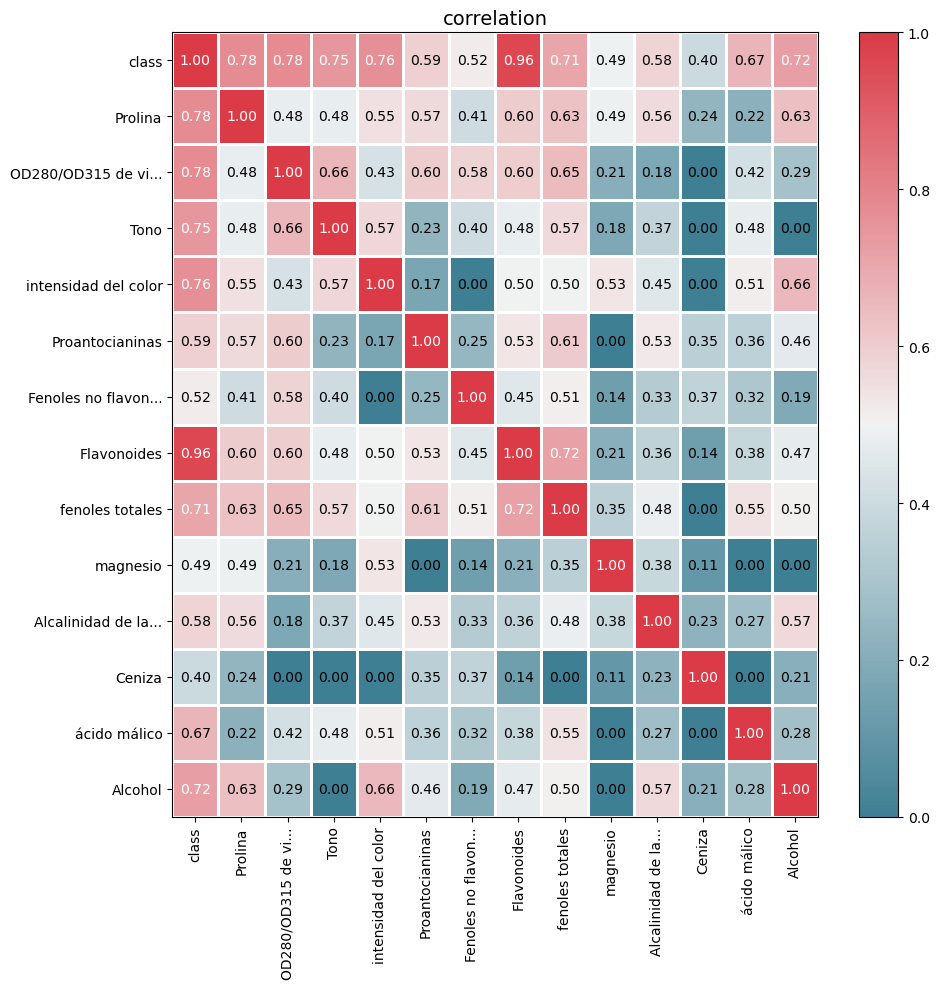

In [18]:
corre = df_scaled.phik_matrix()
cma = sns.diverging_palette(220, 10, as_cmap=True)

plot_correlation_matrix(corre.values, x_labels=corre.columns, y_labels=corre.index, vmin=0, vmax=1, color_map=cma, figsize=(10,10))

In [19]:
target_corr = corre["class"].sort_values(ascending=False)
variables_seleccionadas = target_corr[target_corr > 0.7].index.tolist()
print("Variables seleccionadas:", variables_seleccionadas)
df_scaled.drop(columns=[col for col in df_scaled.columns if col not in variables_seleccionadas], inplace=True)

Variables seleccionadas: ['class', 'Flavonoides', 'OD280/OD315 de vinos diluidos', 'Prolina', 'intensidad del color', 'Tono', 'Alcohol', 'fenoles totales']


c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

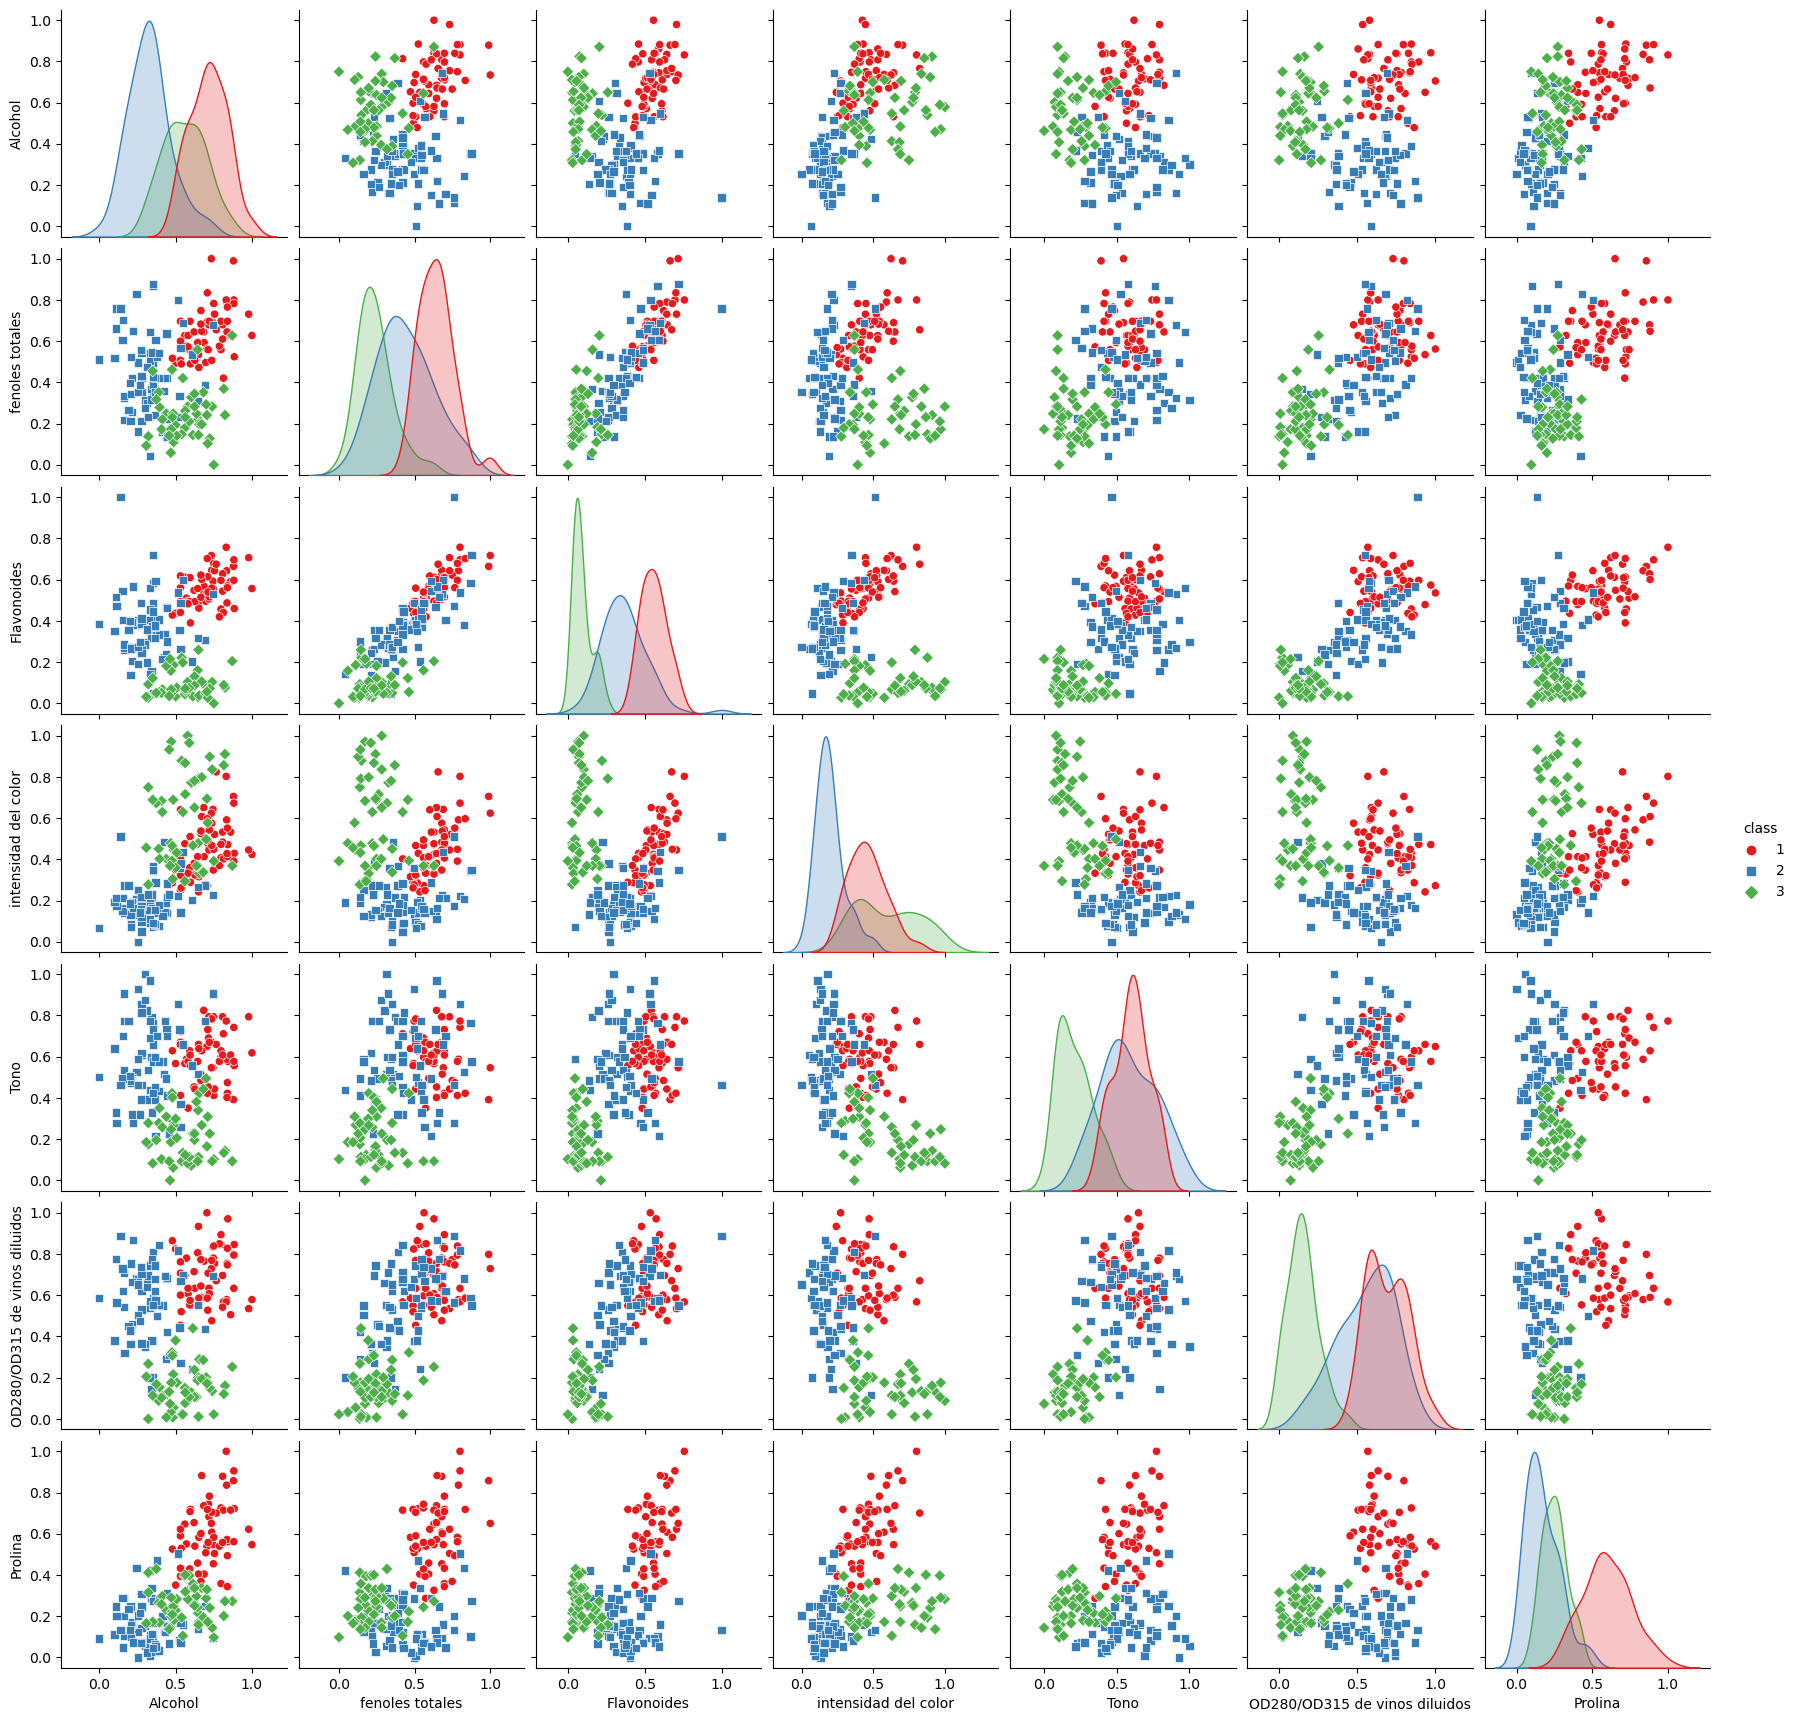

In [20]:
sns.pairplot(df_scaled, hue='class', palette='Set1', diag_kind='kde', markers=["o", "s", "D"]) 

In [21]:
#Separar variable dependiente e independiente
X=df.drop('class', axis=1)
y=df['class']
print(X.shape, y.shape)

#separar datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42) no es necesario porque en gridSearch se hace validacion cruzada
X_train.shape, X_test.shape

(178, 13) (178,)


((142, 13), (36, 13))

In [22]:
#para hacer ColumnTransformer nos basamos en
#https://www.youtube.com/watch?v=irHhDMbw3xo

column_trans = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), list(X.columns))
    ],
    remainder='passthrough'  # Mantener las columnas no transformadas
)

In [23]:
#funcion para crear el pipeline
def create_pipeline(model):
    pipeline = Pipeline([
        ('Encoders', column_trans),
        ('model', model)
    ])
    return pipeline

In [24]:
#diccionario con los modelos y sus hiperparámetros
models = {
    'Logistic Regression': {
        'model': LogisticRegression(), 
        'hyperparameters' : {
            'model__C': [0.01, 0.1, 1, 10],
            'model__penalty': ['l2'],
            'model__solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'model__max_iter': [50, 100, 250, 500, 1000],
            'model__class_weight': [None, 'balanced'],
            'model__tol': [1e-4, 1e-3]
        }
    },
    'SVC': {
        'model': SVC(), 
        'hyperparameters' : {
            'model__C': [0.01, 0.1, 1, 10],  # Rango más amplio
            'model__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Añadido poly
            'model__gamma': ['scale', 'auto'],  # Valores explícitos
            'model__class_weight': [None, 'balanced']
        }
    }
}

In [25]:
#Recorremos el diccionario models que contiene el modelo y los distintos hiperparámetros
#gridSearchCV escoge los mejores hiperparámetros
#en una lista guardamos los mejores modelos

lista_pipelines = []
for i, j in models.items():
    try:
        print(f"\nEntrenando modelo: {j['model']}")
        k = create_pipeline(j['model'])
        print(f"Hiperparámetros: {j['hyperparameters']}")

        grid_s = GridSearchCV(estimator=k, param_grid=j['hyperparameters'], cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2,  error_score='raise')
        print("GridSearchCV...")
        grid_s.fit(X_train, y_train)
        print(f'{i} mejores parámetros: {grid_s.best_params_}\n')

        lista_pipelines.append(grid_s.best_estimator_)
    except Exception as e:
        print(f'Error en modelo {i}: {e}\n')


Entrenando modelo: LogisticRegression()
Hiperparámetros: {'model__C': [0.01, 0.1, 1, 10], 'model__penalty': ['l2'], 'model__solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'model__max_iter': [50, 100, 250, 500, 1000], 'model__class_weight': [None, 'balanced'], 'model__tol': [0.0001, 0.001]}
GridSearchCV...
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Logistic Regression mejores parámetros: {'model__C': 0.1, 'model__class_weight': None, 'model__max_iter': 50, 'model__penalty': 'l2', 'model__solver': 'lbfgs', 'model__tol': 0.0001}


Entrenando modelo: SVC()
Hiperparámetros: {'model__C': [0.01, 0.1, 1, 10], 'model__kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'model__gamma': ['scale', 'auto'], 'model__class_weight': [None, 'balanced']}
GridSearchCV...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
SVC mejores parámetros: {'model__C': 0.01, 'model__class_weight': None, 'model__gamma': 'scale', 'model__kernel': 'poly'}



In [ ]:
#✅ Logistic Regression mejores parámetros: {'model__C': 0.1, 'model__class_weight': None, 'model__max_iter': 50, 'model__penalty': 'l2', 'model__solver': 'lbfgs', 'model__tol': 0.0001}
#✅ SVC mejores parámetros: {'model__C': 0.01, 'model__class_weight': None, 'model__gamma': 'scale', 'model__kernel': 'poly'}

Modelo: LogisticRegression(C=0.1, max_iter=50)
El accuracy del modelo es: 0.9722222222222222
El recall del modelo es: 0.9722222222222222
La precision del modelo es: 0.9743589743589745
El f1 del modelo es: 0.9722633744855966


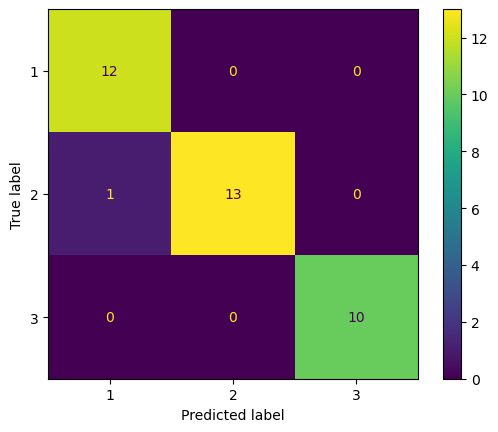



Modelo: SVC(C=0.01, kernel='poly')
El accuracy del modelo es: 0.9444444444444444
El recall del modelo es: 0.9444444444444444
La precision del modelo es: 0.9465811965811967
El f1 del modelo es: 0.944269005847953


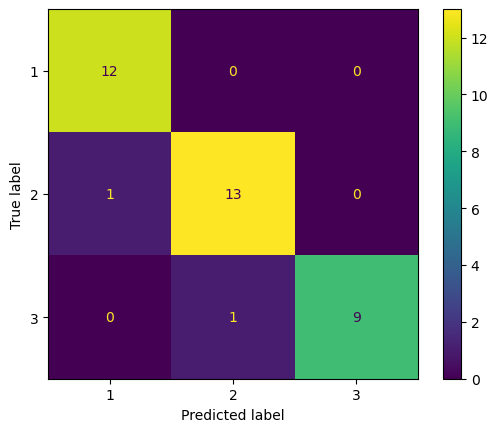

In [26]:
#recorremos la lista que tiene los mejores modelos
#imprimimos las métricas para cada modelo

for i in lista_pipelines:
    print(f'Modelo: {i[-1]}')
    y_pred = i.predict(X_test)
    print(f'El accuracy del modelo es: {accuracy_score(y_test, y_pred)}')
    print(f'El recall del modelo es: {recall_score(y_test, y_pred, average="weighted")}')
    print(f'La precision del modelo es: {precision_score(y_test, y_pred, average="weighted")}')
    print(f'El f1 del modelo es: {f1_score(y_test, y_pred, average="weighted")}')

    mc = confusion_matrix(y_test, y_pred)
    image_matriz = ConfusionMatrixDisplay(confusion_matrix = mc, display_labels=y.unique())
    image_matriz.plot()
    plt.show()
    
    print('\n')

In [31]:
model = lista_pipelines[0][-1]
model

LogisticRegression(C=0.1, max_iter=50)

In [32]:
model.predict(X_test)

c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
with open('Regression.pkl', 'wb') as f:
    pickle.dump(model, f)